# Lab 3: Logistic Regression

In this practice session, you are invited to train a logistic regression classifier using gradient descent method in a first time then a python optimization function. After that your classifier should predict if student will be admitted or not given his score in two main exams. 

In the second part, we will work with more complex data that represents the scores result of two test process on a manufactured microchip. Based on this data, you could use polynomial features to train a classifier that predict if a microchip with known tests result will be accepted or rejected. 

### Student scores dataset
#### Load data

<font color="blue">**Question 1: **</font>The *"exams.txt"* file contains 3 columns that represent the exam 1, exam 2 scores and the result of 100 students (0: Not admitted, 1: Admitted).
- Open this file with a file editor to understand more the data. 
- Load the data in "students_results" variable and check its size.  
**Hint:** You could use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

students_results = np.loadtxt('exams.txt',delimiter='\t')  # ** your code here** 

# you could verify the size of the data using shape() function on numpy array house_data
# ** your code here** 
print(students_results.shape)
#print(students_results)

(100, 3)


#### Extract and visualize features
<font color="blue">**Question 2: **</font> 
- Determine the number of student "m" from the input data "students_results".
- Extract exam 1, exam 2 scores and the result columns respectively in "x_1", "x_2" and "y".  
**Hint:** The shape of "x_1", "x_2" and "y" arrays should be (m,1) for the following questions and not (m,). You could use [newaxis numpy](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) object to add a new axis of length one.
- Determine the number of features "n" (number of columns of array "X").

**Note:** The two exams score have the same scale [0,20]. Thus, we don't need to do feature normalization.


<IPython.core.display.Javascript object>


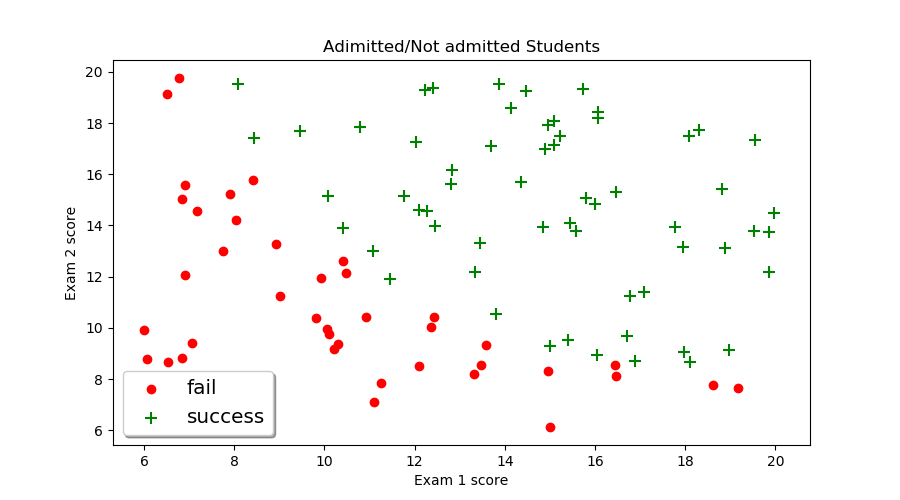

In [3]:
%matplotlib notebook

m = students_results.shape[0] # number of student

x_1 = students_results[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2 = students_results[:,1,np.newaxis] # with shape (100,1) instead of (100,)
X = np.concatenate((np.ones((m,1)),x_1,x_2),axis=1)

n = X.shape[1]                # number of features
y = students_results[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)

# visualize data
plt.figure("Visualize students results",figsize=(9,5))
plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large')

#### Sigmoid and MSE Cost Function
As we see, the linear regression model is not suitable for classification problem (output=0/1) because it may result in $h_\theta(x_i)=\theta^\top x_i<0$ or $h_\theta(x_i)=\theta^\top x_i>1$. Moreover, the linear regression will be very sensitive to an additional data in case of classification problem. Hence, we choose little bit different model the logistic regression where : $$h_\theta(x_i)=sigmoid(\theta^\top x_i)=\frac{1}{1+e^{-\theta^\top x_i}}$$
This new hypothesis formulas will ensure: $0\leq h_\theta(x_i)\leq 1$  

**Recall:** The Mean Squared Error (MSE) cost function equal: $$MSE(\theta) = \frac{1}{2~m} \sum_{i=1}^{m}{(h_\theta(x_i) - y_i)^2}$$

<font color="blue">**Question 3: **</font>
- Implement the "sigmoid" function that helps to calculate the hypothesis $h_\theta$ (given in the previous equation). 
- Implement the "MSE_cost_func" function that evaluate and return the mean squared error according to the given equation (make a vectorized implementation).

MSE cost function for theta=[ 0.  0.  0.] is : [ 0.125]
Minimum value of MSE cost function detected on the plot:  0.130007861729
Value of theta_1, theta_2 that minimize the MSE cost function:  0.102040816327 -0.102040816327


<IPython.core.display.Javascript object>


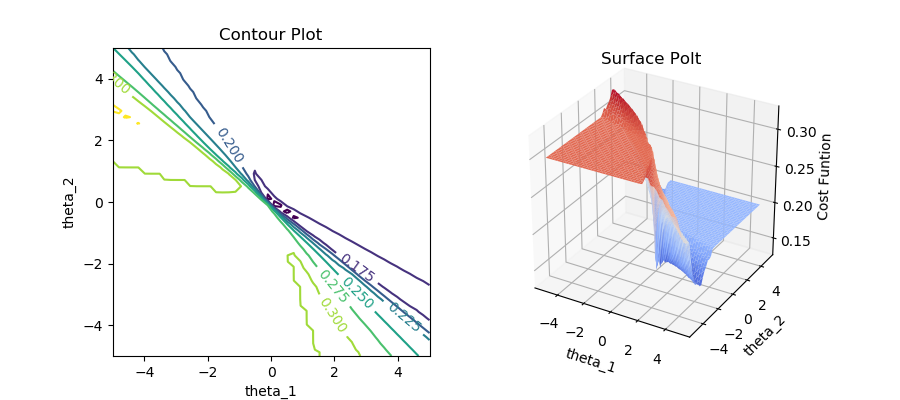

Text(0.5,0,'Cost Funtion')

In [14]:
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm

def sigmoid(z):
    return np.ones(z.shape)/(1+np.exp(-z))

def MSE_cost_func(theta):
    J= 1/2*np.sum((sigmoid(np.dot(X,theta))-y)**2,axis=0)
    return J/m  # this is the vectorized implementation

# evaluate cost function at theta_init
theta_init=np.array([[0],[0],[0]],dtype=float)
cost = MSE_cost_func(theta_init)
print("MSE cost function for theta={0} is : {1}".format(theta_init[:,0],cost))

theta_1 = np.linspace(-5,5,50) # you could also use: theta_1 = np.arange(100, 300, 2)
theta_2 = np.linspace(-5,5,50)    # you could also use: theta_2 = np.arange(-1, 5, 0.05)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
Theta=np.concatenate((np.zeros((*theta_1.shape,1)),theta_1[:,:,np.newaxis],theta_2[:,:,np.newaxis]),axis=-1)

Thetabis=Theta.reshape((Theta.shape[0]*Theta.shape[1],Theta.shape[2]))
Zbis =  MSE_cost_func(Thetabis.transpose())
Z=Zbis.reshape((Theta.shape[0],Theta.shape[1]))
#Z =  1/(2*m)*np.sum((sigmoid(np.dot(Theta,X.transpose()))-np.tile(y[np.newaxis,np.newaxis,:,0],(*theta_1.shape,1)))**2,axis=-1)

print("Minimum value of MSE cost function detected on the plot: ",np.min(Z))
print("Value of theta_1, theta_2 that minimize the MSE cost function: ",theta_1[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))],theta_2[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))])


# the contour plot (projection of 3d plot on 2d plan)
fig=plt.figure('Contour and Surface Plots for MSE cost function',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = plt.contour(theta_1, theta_2, Z)
plt.clabel(ctr, inline=1, fontsize=10)
#ax.imshow(Z,cmap=cm.coolwarm)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

# the surface plot (3d plot)
ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_1,theta_2,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=1,antialiased=True)

ax.set_title('Surface Polt')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost Funtion')

<font color="green">**Observation: **</font> 
- We note that the Mean Squared Error (MSE) cost function is not convex since it doesn't have bowl shape. Thus, we cannot use gradient descent or other analytic methods to find the global minimum of the cost function.

#### Logistic cost function
<font color="blue">**Question 4: **</font> 
- Implement the "cost_func" function that evaluate and return the logistic cost function (inspired from maximum likelihood equation) given in the following equation (make a vectorized implementation): $$J(\theta)=\frac{-1}{m}\sum_{i=1}^{m}\left [y\times log(h_\theta(x))+(1-y)\times log(1-h_\theta(x))\right ]$$

Cost function for theta=[ 0.  0.  0.] is : [ 0.69314718]
Minimum value of cost function detected on the plot:  0.715014741172
Value of theta_1, theta_2 that minimize the cost function:  0.102040816327 -0.102040816327


<IPython.core.display.Javascript object>


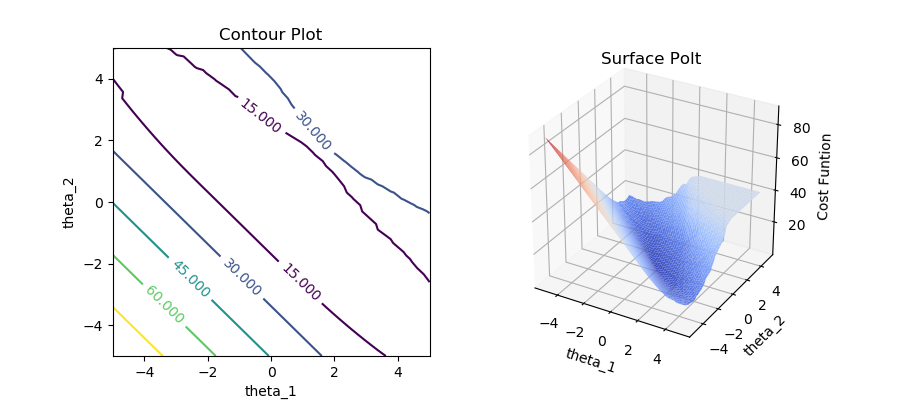

Text(0.5,0,'Cost Funtion')

In [11]:
def cost_func(theta):
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta))),axis=0)-np.sum((1-y)*np.log(1-sigmoid(np.dot(X,theta))),axis=0)
    return J/m  

# evaluate cost function at theta_init
cost = cost_func(theta_init)
print("Cost function for theta={0} is : {1}".format(theta_init[:,0],cost))

Z=np.zeros(theta_1.shape)
for i in range(theta_1.shape[0]):
    for j in range(theta_1.shape[1]):
        for k in range(m):
            if (y[k,0]==1):
                if (sigmoid(np.dot(Theta[i,j,:],X[k,:]))==0):
                    Z[i,j]+=100
                else:
                    Z[i,j]-=np.log(sigmoid(np.dot(Theta[i,j,:],X[k,:])))
            else:
                if (sigmoid(np.dot(Theta[i,j,:],X[k,:]))==1):
                    Z[i,j]+=100
                else:
                    Z[i,j]-=np.log(1-sigmoid(np.dot(Theta[i,j,:],X[k,:])))
Z=Z/m          
#Y=np.tile(y[np.newaxis,np.newaxis,:,0],(*theta_1.shape,1))
#Z =  -1/m*np.sum((Y*np.log(sigmoid(np.dot(Theta,X.transpose())))+(1-Y)*np.log(1-sigmoid(np.dot(Theta,X.transpose())))),axis=-1)

print("Minimum value of cost function detected on the plot: ",np.min(Z))
print("Value of theta_1, theta_2 that minimize the cost function: ",theta_1[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))],theta_2[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))])


# the contour plot (projection of 3d plot on 2d plan)
fig=plt.figure('Contour and Surface Plots Logistic cost function',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = plt.contour(theta_1, theta_2, Z)
plt.clabel(ctr, inline=1, fontsize=10)
#ax.imshow(Z,cmap=cm.coolwarm)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

# the surface plot (3d plot)
ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_1,theta_2,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=1,antialiased=True)
ax.set_title('Surface Polt')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost Funtion')


<font color="green">**Observation: **</font> 
- We note that the logistic cost function is not perfectly convex but it is more convex than the MSE cost function.  Hence, we can use gradient descent algorithm to minimize it. however, gradient descent will take relatively long time since the cost function is not perfectly convex.

#### Gradient vector and gradient descent algorithm
The gradient vector of the logistic cost function is calculated as following: $$\nabla J(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}
\\ \frac{\partial J(\theta)}{\partial \theta_1}
\\ \vdots
\\ \frac{\partial J(\theta)}{\partial \theta_{n-1}}
\end{bmatrix}$$ 
where: $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x_i) - y)~x_j} ~~for~ j=0\dots n-1$
<font color="blue">**Question 5: **</font> 
- Implement the "grad_cost_func" function that evaluates the gradient of logistic cost function at the point theta considering the $j^{th}$ component as given on the previous equation.
- Implement the update equation of the gradient descent algorithm given by: 
$$\theta=\theta-\alpha \nabla J(\theta)$$

** Note:** The execution of this block of code could take several seconds.

In [8]:
import time

def grad_cost_func(theta):
    g=(1/(m))*(np.dot(X.transpose(),(sigmoid(np.dot(X,theta))-y)))  # this is the vectorized implementation    
    return g  

# evaluate gradient of cost function at theta_init
grad=grad_cost_func(theta_init)
print("Gradient for theta={0} is : {1}".format(theta_init[:,0],grad[:,0]))

def grad_descent(grad_func, theta0,max_iter=1000,alpha=0.001,gtol=10**(-10)):
    # max_iter: maximum number of iteration or steps to make
    # alpha: steplength or learning rate
    # gtol: gradient tolerance if gradient goes below this value we can say that our algorithm converge
    i=0
    J=[]
    theta=theta0.copy()
    while (i < max_iter):# and (np.sum(g**2) > gtol):
        i+=1
        g=grad_func(theta)
        theta=theta-alpha*g
        J.append(cost_func(theta))
    return theta,J

start_time = time.time()
theta_opt,J1=grad_descent(grad_cost_func,theta_init,max_iter=100000,alpha=0.001)
print("The gradient descent algorithm take {:.4f} s to finish calculation".format(time.time()-start_time))
print("The optimal value of theta that minimize cost function is: ",theta_opt[:,0])
print("Final error = ",J1[len(J1)-1])


Gradient for theta=[ 0.  0.  0.] is : [-0.1     -2.40185 -2.2527 ]
The gradient descent algorithm take 6.8872 s to finish calculation
The optimal value of theta that minimize cost function is:  [-4.80213465  0.22600258  0.19057814]
Final error =  [ 0.38768543]


<font color="green">**Comments: **</font> 
- The gradient equation in logistic regression looks similar to linear regression but you should notice that the expression of $h_\theta(x_i)$ is given by the sigmoid function which is different to the case of linear regression.
- The optimal theta, has 3 component: the intercept coefficient for exam 1 and coefficient of exam 2.
- Beside optimal theta, "grad_descent" function return a list "J" that contains values of cost function for theta after each update step.  

#### Selecting learning rate
Execute the following code and visualize learning curves that describe the decrease of the cost function during the gradient descent iterations.

<font color="blue">**Question 6: **</font> 
- Set the learning rate "alpha" to the best value that helps to decrease quickly the cost function. 

** Note:** The execution of this block of code could take several seconds.


<IPython.core.display.Javascript object>


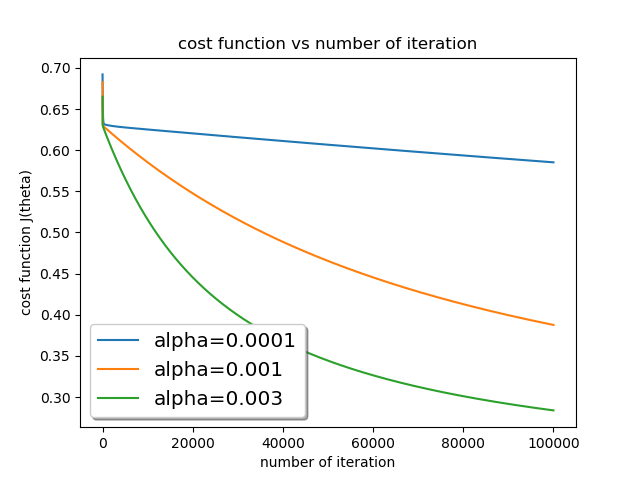

In [14]:
# calculate the optimal value of theta that minimize cost function

theta_opt2,J2=grad_descent(grad_cost_func,theta_init,max_iter=100000,alpha=0.003)
theta_opt3,J3=grad_descent(grad_cost_func,theta_init,max_iter=100000,alpha=0.0001)

plt.figure('Learning curves')
plt.plot(range(len(J3)),J3,label='alpha=0.0001')
plt.plot(range(len(J1)),J1,label='alpha=0.001')
plt.plot(range(len(J2)),J2,label='alpha=0.003')

plt.xlabel('number of iteration')
plt.ylabel('cost function J(theta)')
plt.title('cost function vs number of iteration')
plt.legend(loc='best', shadow=True, fontsize='x-large')

best_alpha = 0.003 # set the best value of alpha

<font color="green">**Observation: **</font> 
- Learning curves (cost function vs number of iteration) shown above, present different convergence rate depending on the parameter $\alpha$. We note that as the steplenght $\alpha$ increase the convergence become faster. However, if learning rate $\alpha$ is to high (try $\alpha=0.3~or~1$) the algorithm will diverge and the cost function will be too high.  

<font color="green">**Recommendation: **</font> 
- To select the best value of alpha, we could start by small value then we increase $\alpha$ progressively. We should select the highest value of $\alpha$ before the algorithm diverge. The rule of thumbs for varying $\alpha$ is to increase it by factor of 3. For example, we could select $\alpha=0.0001,~0.0003,~0.001,~0.003,~0.01,~0,03,~0.1 \dots$

<font color="blue">**Question 7: **</font> 
- From the learning curves the cost function seems to decrease more. Hence, try to run the gradient descent with 1000000 (1 million) iterations and describe the difference between two cases.
- Use the optimal theta calculated to predict the result of student who has a score of 11 in exam 1 and a score of 9.5 in exam 2.  

** Note:** The execution of this block of code could take up to one minute.

The gradient descent algorithm take 72.6475 s to finish calculation
The optimal value of theta that minimize cost function is:  [-21.05802867   0.86716358   0.84128323]
Final error =  [ 0.20632138]
The predicted result of student with 11 and 9.5 scores is: Not admitted
With an admission probability:  [[ 0.02855262]]


<IPython.core.display.Javascript object>


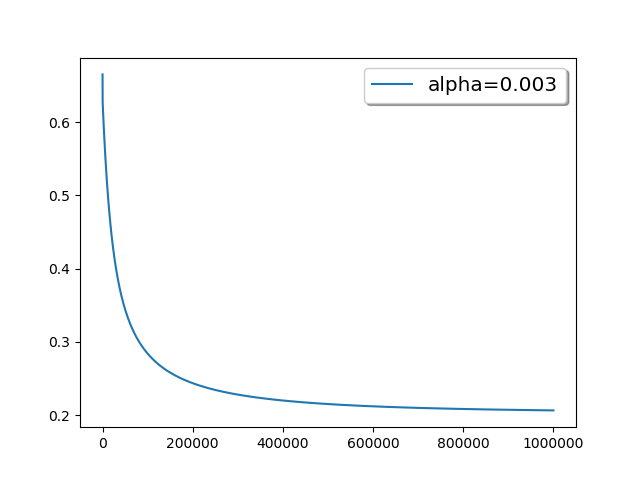

<IPython.core.display.Javascript object>


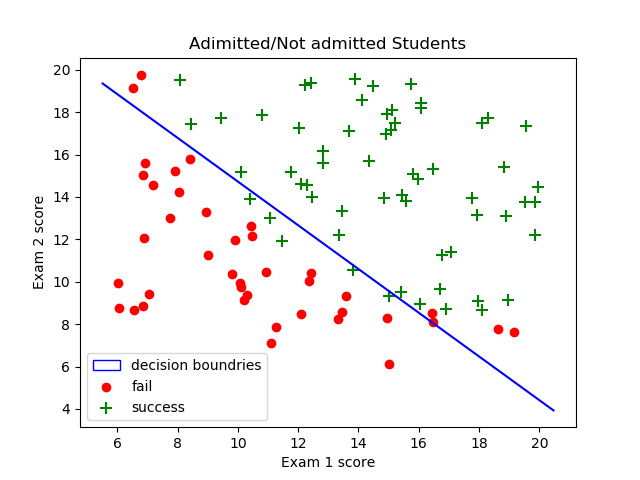

In [16]:
from matplotlib.patches import Rectangle

# calculate optimal theta
start_time = time.time()
theta_opt,J=grad_descent(grad_cost_func,theta_init,max_iter=1000000,alpha=best_alpha)
print("The gradient descent algorithm take {:.4f} s to finish calculation".format(time.time()-start_time))
print("The optimal value of theta that minimize cost function is: ",theta_opt[:,0])
print("Final error = ",J[len(J)-1])

# predict student result
exam_1 = 11
exam_2 = 9.5
result = sigmoid(np.dot(np.array([[1,exam_1,exam_2]]),theta_opt))
print("The predicted result of student with {0} and {1} scores is: {2}".format(exam_1,exam_2,['Not admitted','Admitted'][int(round(result[0,0]))]))
print("With an admission probability: ",result)

# plot learning curve
plt.figure('Learning curve')
plt.plot(range(len(J)),J,label='alpha=0.003')
plt.legend(loc='best', shadow=True, fontsize='x-large')

# plot classifier decision boundries and data 
plt.figure('decision boundries')
fail=plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
succ=plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
plt.plot([np.min(X[:,1])-0.5,np.max(X[:,1])+0.5],[(-theta_opt[0,0]-theta_opt[1,0]*(np.min(X[:,1])-0.5))/theta_opt[2,0],(-theta_opt[0,0]-theta_opt[1,0]*(np.max(X[:,1])+0.5))/theta_opt[2,0]],color="blue")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
extra = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([extra,fail,succ], ("decision boundries","fail","success"),loc='lower left')

<font color="green">**Observation: **</font> 
- We note that the gradient descent algorithm take long time (1 millions steps) to converge because of the non-perfect convexity of the cost function. But at the end, we get good result illustrated by the decision boundaries that separate the two classes.

#### Minimize cost function with python optimization function:
We note that the gradient descent algorithm takes a lot of time and it is not suitable for optimizing complex  function like logistic cost function. Hence, we will use [fmin_bfgs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_bfgs.html) optimization function from the [scipy](https://www.scipy.org/) library in python.
<font color="blue">**Question 8: **</font> 
- The "fmin_bfgs" function work with theta and gradient array in form (n,) and nor (n,1). re-implement cost function ("cost_func2") and gradient function ("grad_cost_func2") that deal with this kind of arrays.
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("cost_func2"), the name of gradient cost function ("grad_cost_func2") and the initial theta ("theta0").  
**Hint:** You could use [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.reshape.html) function to modify the shape of the gradient vector

Optimization terminated successfully.
         Current function value: 0.203398
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
The 'fmin_bfgs' function take 0.0047 s to finish calculation
The optimal value of theta that minimize cost function is:  [-25.1725301   1.0316124   1.0077848]
Final error =  0.203398338223


<IPython.core.display.Javascript object>


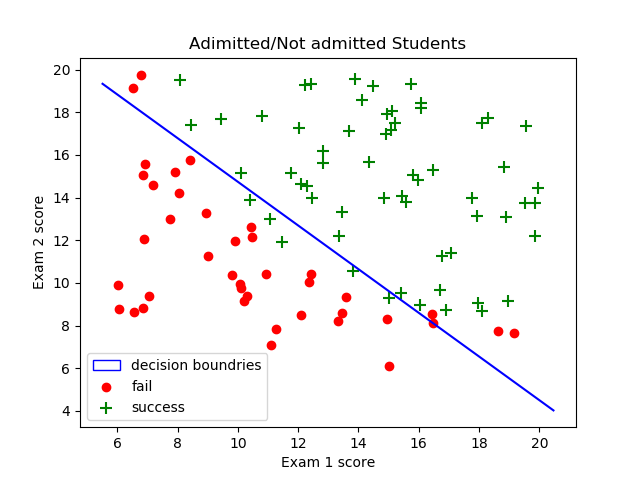

In [17]:
from scipy.optimize import fmin_bfgs

def cost_func2(theta):
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta[:,np.newaxis]))))-np.sum((1-y)*np.log(1-sigmoid(np.dot(X,theta[:,np.newaxis]))))
    return J/m  

def grad_cost_func2(theta):
    g=(1/m)*(np.dot(X.transpose(),(sigmoid(np.dot(X,theta[:,np.newaxis]))-y)))  # this is the vectorized implementation
    g.shape=(g.shape[0],) # you could also use g=np.reshape(g, (g.shape[0],))
    return g  

# calculate the optimal theta
theta0=np.array([0,0,0],dtype=float)
start_time = time.time()
Thopt= fmin_bfgs(cost_func2,theta0,fprime=grad_cost_func2)
print("The 'fmin_bfgs' function take {:.4f} s to finish calculation".format(time.time()-start_time))
print("The optimal value of theta that minimize cost function is: ",Thopt)
print("Final error = ",cost_func2(Thopt))

# plot linear model and data 
plt.figure('Linear decision boundries')
fail=plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
succ=plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
plt.plot([np.min(X[:,1])-0.5,np.max(X[:,1])+0.5],[(-Thopt[0]-Thopt[1]*(np.min(X[:,1])-0.5))/Thopt[2],(-Thopt[0]-Thopt[1]*(np.max(X[:,1])+0.5))/Thopt[2]],color="blue")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Adimitted/Not admitted Students')
plt.legend([extra,fail,succ], ("decision boundries","fail","success"),loc='lower left')

<font color="green">**Observation: **</font> 
- The python optimization function "fmin_bfgs" is a well optimized implementation of **"BFGS"** algorithm that could deal with not strongly convex function. Thus, it run much much faster (about 10000 times) than our gradient descent implementation. And finally, we get similar result for the decision boundaries. Hence, it is better to use python optimization function “fmin_bfgs” for next optimization problem. 

### Microchip testing data set
The microchip data set contains 3 columns. The scores result of two test process on a manufactured microchips is presented in the 2 first columns. While the third column indicates if the corresponding microchip were accepted or rejected.

<font color="blue">**Question 9: **</font> 
- Load data from "microchip.txt" file and extract each column.  
**Hint:** You could use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.

**Note:** The two tests score have the same scale [-1,1]. Thus, we don't need to do feature normalization.


<IPython.core.display.Javascript object>


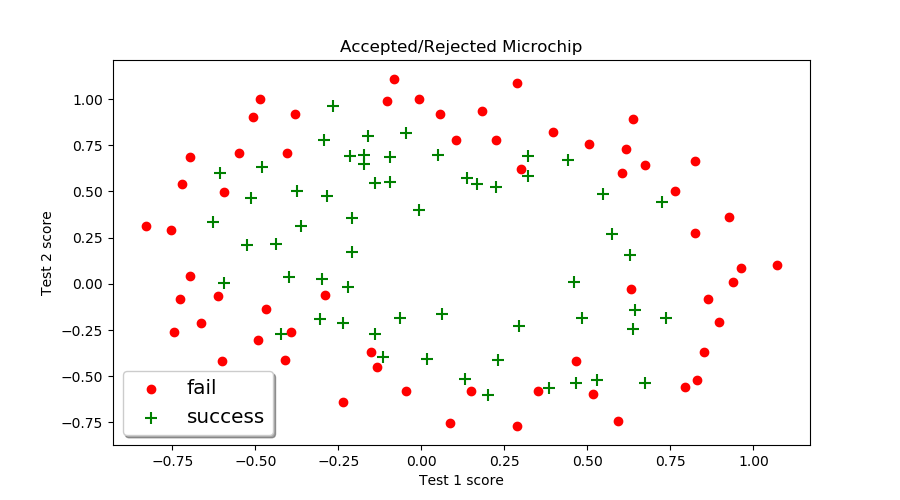

In [18]:
# load data
microchip_data = np.loadtxt('microchip.txt',delimiter=',')  # ** your code here** 

# you could verify the size of the data using shape() function on numpy array house_data
# ** your code here** 
#print(microchip_data.shape)
#print(microchip_data)

m = microchip_data.shape[0] # number of microchips

x_1 = microchip_data[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
x_2 = microchip_data[:,1,np.newaxis] # with shape (100,1) instead of (100,)

y = microchip_data[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (100,1) instead of (100,)

# visualize data
plt.figure("Visualize microchip data",figsize=(9,5))
plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80, label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip')
legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large')

<font color="blue">**Question 10: **</font> 
- Implement the "Poly_Features" function that concatenate to data array the different possible power (below deg) of feature vector f1 and f2 as shown below:$$data=[data,~f_1,~ f_1^2,~ \dots,~ f_1^{deg},~ f_2,~ f_2^2,~ \dots,~ f_2^{deg}]$$

In [21]:

def Poly_Features(data,f1,f2,deg):
    # Integrate polynomial terms (x_1^i and x_2^i where i<=degree) and interaction terms (x_1^i*x_2^j where i+j<=degree)
    '''
    for i in range(1,deg+1):
        for j in range(i+1):
             X = np.concatenate((X,f1**(i-j)*f2**j),axis=1)
    '''
    # Integrate polynomial terms only (x_1^i and x_2^i where i<=degree)
    for i in range(1,deg+1):
        data = np.concatenate((data,f1**i),axis=1)
    for j in range(1,deg+1):
        data = np.concatenate((data,f2**j),axis=1)
    return data

degree=8
# degree of polynomial feature
X=np.ones((m,1))   # initialize X array

# add polynomial features to the array data X
X = Poly_Features(X,x_1,x_2,degree)
n = X.shape[1]

<font color="blue">**Question 11: **</font> 
- Call "fmin_bfgs" function to calculate the optimal theta. This function take as parameters: the name of cost function ("cost_func2"), the name of gradient cost function ("grad_cost_func2") and the initial theta ("theta0").
- Use the optimal theta calculated to predict a microchip result that has a score of 0.5 in test 1 and a score of -0.5 in test 2.  

In [1]:
# calculate optimal theta
theta0=np.zeros((n,))
Thopt = fmin_bfgs(cost_func2,theta0,fprime=grad_cost_func2) 
print("The optimal value of theta that minimize cost function is: ",Thopt)
print("Final error = ",cost_func2(Thopt))

# predit microchip result
test_1 = 0.5
test_2 = -0.5
Test = Poly_Features(np.ones((1,1)),np.array([[test_1]]),np.array([[test_2]]),degree)
result = sigmoid(np.dot(Test,Thopt))
print("The predicted result of microchip with {0} and {1} scores is: {2}".format(test_1,test_2,['Rejected','Accepted'][int(round(result[0]))]))
print("With an acceptance probability: ",result)

# calculate the mesh grid for contour plot
u1=np.linspace(-1,1.5,50)
u2=np.linspace(-1,1.5,50)
u1, u2 = np.meshgrid(u1, u2)

X3=np.ones((*u1.shape,1))
'''
for i in range(1,degree+1):
    for j in range(i+1):
         X3 = np.concatenate((X3,u1[...,np.newaxis]**(i-j)*u2[...,np.newaxis]**j),axis=-1)
'''    
for i in range(1,degree+1):
    X3 = np.concatenate((X3,u1[...,np.newaxis]**i),axis=-1)
for j in range(1,degree+1):
    X3 = np.concatenate((X3,u2[...,np.newaxis]**j),axis=-1)
    
Z=np.dot(X3,Thopt)

# plot descision boundries
plt.figure("Microchip decision boundries",figsize=(9,5))
fail=plt.scatter(x_1[y==0], x_2[y==0],  color='red',label='fail')
success=plt.scatter(x_1[y==1], x_2[y==1],  color='green',marker='+',s=80,label='success')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Accepted/Rejected Microchip')
ctr = plt.contour(u1, u2, Z,0,colors="blue")
plt.legend([extra,fail,success], ("decision boundries","fail","success"),loc='best')

NameError: name 'np' is not defined

<font color="green">**Observation: **</font> 
- The decision boundaries has an elliptic shape that try to separate the two classes of training data. If we try to fit the data with a higher "degree" polynomial (for example try degree=8 in the previous code block), we will note that the decision boundaries become more complex and it try to fit each single point on the dataset. This is called an overfitting problem (we will see more details about overfitting in next sessions).